In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.listdir('/content')


['.config', 'ecommerce_transactions.csv', 'sample_data']

In [4]:
df = pd.read_csv('/content/ecommerce_transactions.csv')

In [5]:
df.head()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,4/14/2023
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,7/30/2023
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,9/17/2023
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,6/21/2023
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,10/29/2024


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB


In [ ]:
df.shape

(50000, 8)

In [7]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df.head()


,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29


In [8]:
df['Month'] = df['Transaction_Date'].dt.month_name()
df['Day'] = df['Transaction_Date'].dt.day_name()
df.head()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Month,Day
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14,April,Friday
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30,July,Sunday
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17,September,Sunday
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21,June,Wednesday
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29,October,Tuesday


In [9]:
df['Age_Group'] = pd.cut(df['Age'],
    bins=[0, 18, 25, 35, 45, 60, 100],
    labels=['<18', '18-25', '26-35', '36-45', '46-60', '60+'])


In [10]:
df.head()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Month,Day,Age_Group
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14,April,Friday,60+
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30,July,Sunday,46-60
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17,September,Sunday,26-35
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21,June,Wednesday,36-45
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29,October,Tuesday,46-60


In [11]:
df['Purchase_Amount'].sum()


np.float64(25157989.650000002)

In [13]:
category_sales = (
    df.groupby('Product_Category')['Purchase_Amount'].sum().sort_values(ascending=False)
)
category_sales

,Purchase_Amount
Product_Category,
Sports,3195335.90
Toys,3185652.36
Books,3181897.30
Clothing,3171225.96
Electronics,3133965.04
Grocery,3123579.52
Home & Kitchen,3108945.78
Beauty,3057387.79


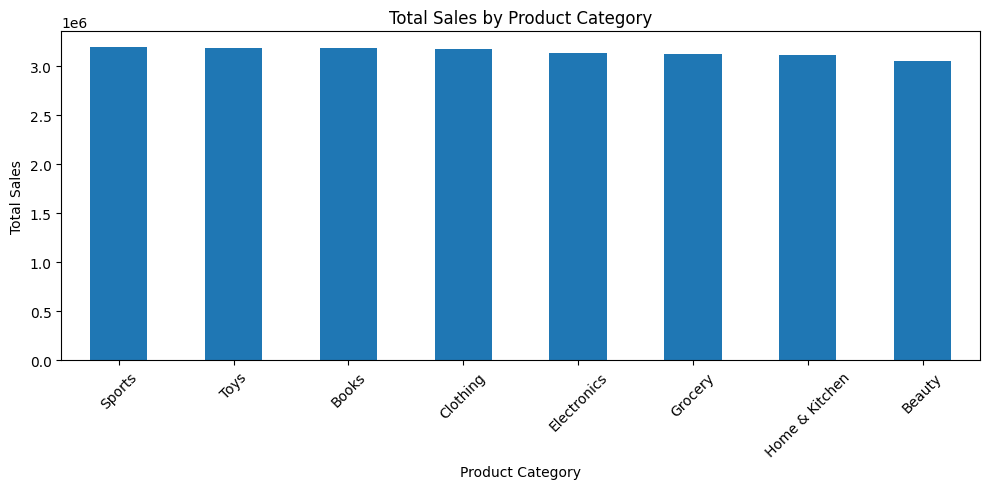

In [ ]:
plt.figure(figsize=(10,5))
category_sales.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Category-wise Sales
- Revenue is evenly distributed across all product categories.
- Sports, Toys, and Books generate the highest sales, each contributing approximately 31.8–31.9lakh.
- Beauty and Home & Kitchen show slightly lower sales indicating potential areas for targeted growth strategies.
- Overall, the business benefits from diversified category performance so there is less dependency on any single category.

In [14]:
monthly_sales = (df.groupby(df['Transaction_Date'].dt.to_period('M'))['Purchase_Amount'].sum())
monthly_sales

,Purchase_Amount
Transaction_Date,
2023-03,802390.44
2023-04,1046921.48
2023-05,1050553.40
2023-06,1011635.06
2023-07,1105402.88
2023-08,1044738.24
2023-09,1030080.62
2023-10,1046800.13
2023-11,1016654.63


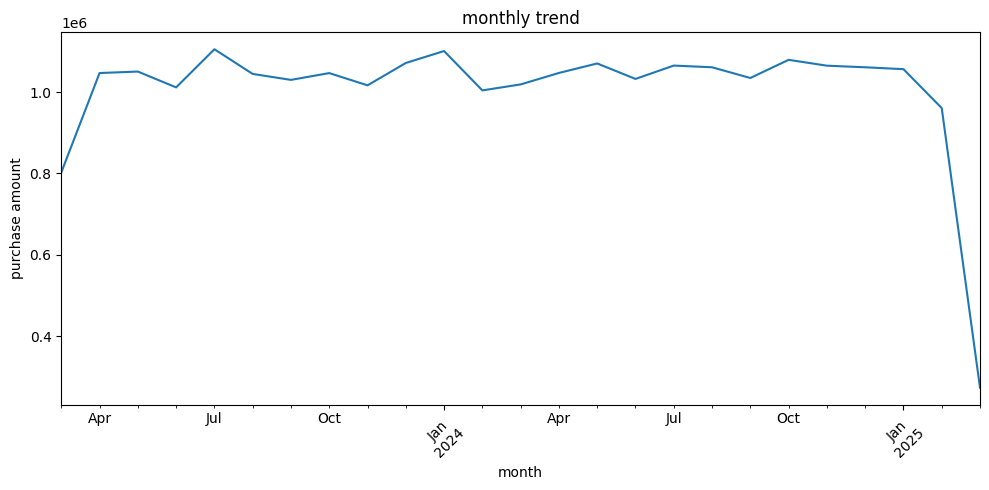

In [ ]:
plt.figure(figsize=(10,5))
monthly_sales.plot(kind = 'line')
plt.title('monthly trend')
plt.xlabel('month')
plt.ylabel('purchase amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Monthly Sales Trend
-  Monthly sales remain consistent between 10 lakh and 11 lakh for most of the period insinuating stable revenue.
-july mid year peak, december year-end and new year sales peaks are visible.
- there is a decline in march sales both in 2023 and 2025 which might associate to missing data
- this trend shows a stable business revenue
- we still do have opportunities for targeted promotions in the lower performing months.

In [15]:
age_spending = (df.groupby('Age_Group')['Purchase_Amount'].sum().sort_values(ascending=False))

age_spending

/tmp/ipython-input-1016604467.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending = (df.groupby('Age_Group')['Purchase_Amount'].sum().sort_values(ascending=False))


,Purchase_Amount
Age_Group,
46-60,7039125.14
36-45,4863329.78
26-35,4781196.28
60+,4714496.62
18-25,3286900.99
<18,472940.84


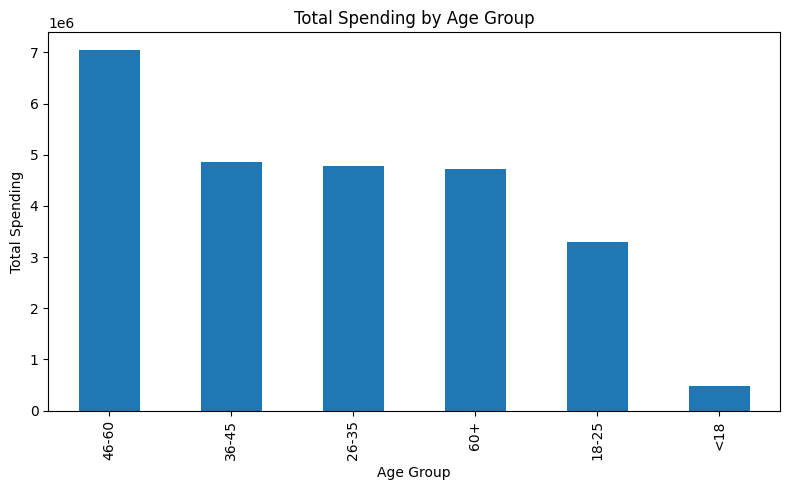

In [ ]:
plt.figure(figsize=(8,5))
age_spending.plot(kind='bar')
plt.title('Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spending')
plt.tight_layout()
plt.show()

- Customers aged 46–60 are the highest revenue contributors generating approximately 70,4lakhs in sales.
- Mid-age groups (26–45) together contribute a significant share of revenue indicating a strong and stable customer base.
- The 60+ age group also contributes substantially, highlighting active participation of senior customers.
- Younger segments (18–25 and <18) show lower spending, likely due to limited purchasing power.
- Overall, revenue increases with age, suggesting marketing and retention strategies should focus on older customer segments.

In [16]:
 pay_max = (df.groupby('Payment_Method')['Purchase_Amount'].sum().sort_values(ascending= False))
 pay_max

,Purchase_Amount
Payment_Method,
Cash on Delivery,4276269.38
UPI,4259355.65
Debit Card,4234776.21
PayPal,4173529.85
Credit Card,4150547.15
Net Banking,4063511.41


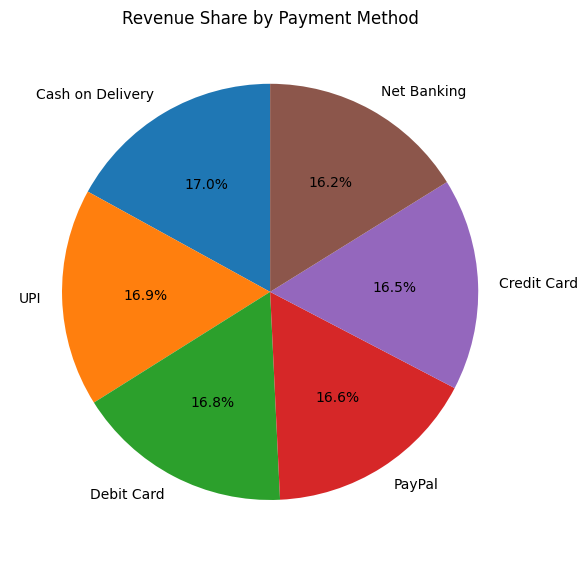

In [17]:
plt.figure(figsize=(6,6))
pay_max.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Revenue Share by Payment Method')
plt.ylabel('')
plt.tight_layout()
plt.show()

- Revenue is evenly distributed across payment methods, ranging between approximately 40.6lakhs and 42.8lakhs.
- Cash on Delivery is the top contributor, indicating continued customer trust in COD.
- Digital payment methods such as UPI, Debit Card, PayPal, and Credit Card show strong and balanced adoption.
- Net Banking contributes slightly less but remains a significant payment channel.
- Overall, the diversified payment mix reduces dependency risk and allows focus on cost and conversion optimization.

In [ ]:
revenue_country = (df.groupby('Country')['Purchase_Amount'].sum().sort_values(ascending=True))
revenue_country

,Purchase_Amount
Country,
UK,2471723.15
Japan,2492312.20
Germany,2502442.20
India,2503542.71
Brazil,2507287.54
Australia,2514911.65
Mexico,2534475.67
USA,2541220.22
Canada,2544335.12


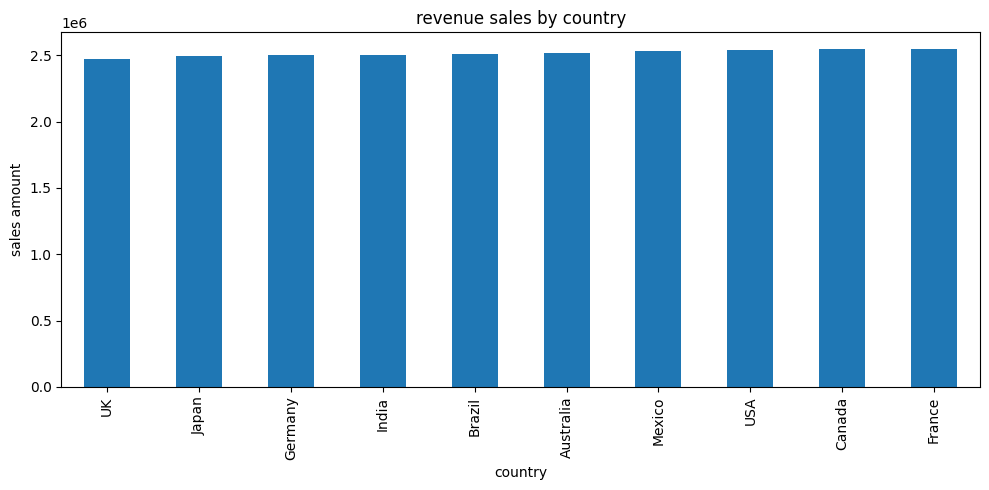

In [ ]:
plt.figure(figsize=(10,5))
revenue_country.plot(kind='bar')
plt.title('revenue sales by country')
plt.xlabel('country')
plt.ylabel('sales amount')
plt.tight_layout()
plt.show()

 Revenue by Country Insights
- Revenue is evenly distributed across countries, ranging from approximately 24.7lakhs to 25.5lakhs.
- The business demonstrates strong geographic diversification with no dependency on a single market.
- North America and Western Europe slightly lead, but differences are marginal.
- Emerging markets such as India and Brazil perform on par with developed economies.
- Overall, growth opportunities lie in expanding customer value rather than reallocating focus across regions.

In [ ]:
avg_order_value = (df.groupby('Product_Category')['Purchase_Amount'].mean().sort_values(ascending=False))
avg_order_value

,Purchase_Amount
Product_Category,
Clothing,509.515739
Books,508.859316
Sports,506.231923
Beauty,503.273710
Grocery,502.587212
Home & Kitchen,500.716022
Toys,498.381158
Electronics,495.880544


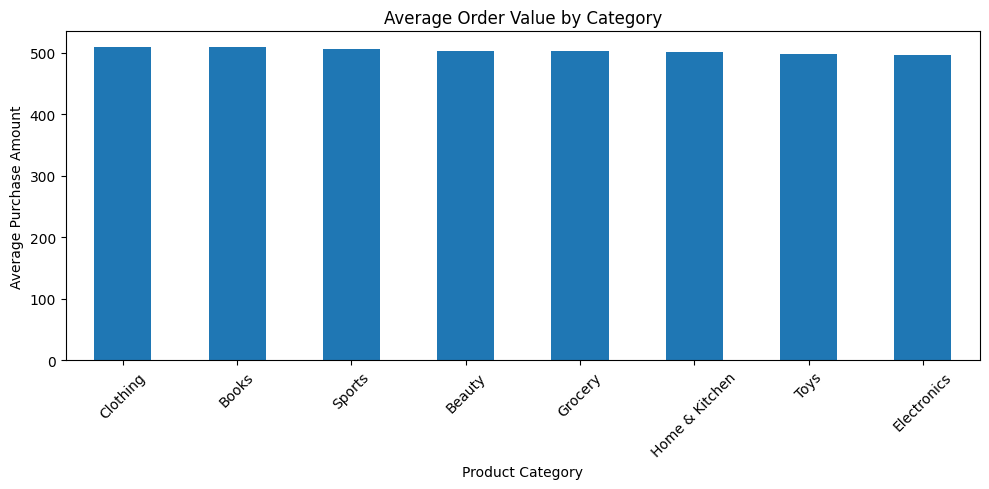

In [ ]:
avg_order_value.plot(kind='bar', figsize=(10,5))
plt.title('Average Order Value by Category')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Average Order Value by Category Insights
- Clothing and Books have the highest average order value, at approximately 509 each.
- Average order values across categories are somwhere between roughly 496 and 510.
- Electronics shows the lowest average order value, suggesting potential for bundling or premium upsell strategies.
- Overall, consistent AOV across categories indicates a stable pricing strategy, with growth opportunities driven by increasing transaction volume rather than order size.

Final Conclusion

This project analyzed e-commerce transactional data using SQL and Python to understand revenue patterns, customer behavior, and purchasing trends.

Key findings include:
- Balanced revenue distribution across product categories and countries
- Strong contribution from mid-age and older customer segments
- Stable monthly sales with clear seasonal patterns
- Even adoption across payment methods, reducing dependency risk

Overall, the analysis highlights a well-diversified business with opportunities for growth through targeted marketing, customer retention, and seasonal optimization.